In [1]:
"""By Kutay/Berkay DÖNMEZ"""

#should get bs4, html5lib, lxml packages first
import scipy.constants as sc
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
from dask.distributed import Client
import matplotlib.pyplot as plt
from metpy.plots import  SkewT
from metpy.units import units
from scipy.ndimage import gaussian_filter
import cartopy
import metpy.calc as mpcalc
from scipy.ndimage.filters import minimum_filter, maximum_filter
import numpy as np
import matplotlib.colors as colors
from datetime import datetime
import matplotlib.patheffects as PathEffects
import cdsapi
import proplot as plot
import os
import cartopy.crs as ccrs
import Compact_Maps
from OpenThermodynamicData import opendownloadeddata
from Hodograph import hodograph
from Skewt import skewt
import asyncio
from dask.distributed import Client, LocalCluster, fire_and_forget

In [2]:
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:58060 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 7.81 GiB


# Open each file and concat

# CFSR AND CFSV2

In [5]:
base_url = r'C:\Users\USER\JupyterLab\Climaturk_Site\Docs\STORM_DATA\precipitation'
data_url = r'CFSV2'
cfsr_cfsv2 = xr.open_mfdataset(f'{base_url}\\{data_url}\\*.nc')

In [6]:
cfsr_cfsv2_1daysum = cfsr_cfsv2['A_PCP_L1_Accum_1'].resample(time = '1D', keep_attrs = True).sum(keep_attrs = True)

In [7]:
data_type = 'DAILY_CFSR_CFSV2'
save_name = 'DAILY_CFSR_CFSV2.nc'
cfsr_cfsv2_1daysum.compute().to_netcdf(f'{base_url}\\{data_type}\\{save_name}')

In [47]:
cfsr_cfsv2

<xarray.Dataset>
Dimensions:                (lat: 41, lon: 61, ntb: 2, time: 16072)
Coordinates:
  * time                   (time) datetime64[ns] 2010-01-01T01:00:00 ... 2020...
  * lat                    (lat) float32 50.0 49.5 49.0 48.5 ... 31.0 30.5 30.0
  * lon                    (lon) float32 20.0 20.5 21.0 21.5 ... 49.0 49.5 50.0
Dimensions without coordinates: ntb
Data variables:
    time_bnds              (time, ntb) datetime64[ns] dask.array<chunksize=(124, 2), meta=np.ndarray>
    valid_date_time_range  (time, ntb) |S10 dask.array<chunksize=(124, 2), meta=np.ndarray>
    ref_date_time          (time) |S10 dask.array<chunksize=(124,), meta=np.ndarray>
    forecast_hour          (time) timedelta64[ns] dask.array<chunksize=(124,), meta=np.ndarray>
    A_PCP_L1_Accum_1       (time, lat, lon) float32 dask.array<chunksize=(124, 41, 61), meta=np.ndarray>
Attributes:
    Creation date and time:  2021-04-11 07:30:14 -0600
    Conventions:             CF-1.5
    Creator:                 NCAR - CISL RDA (dattore)

# JRA55

In [8]:
data_url = r'JRA-55'
jra55 = xr.open_mfdataset(f'{base_url}\\{data_url}\\*.nc')

In [9]:
jra55_1daysum = jra55['TPRAT_GDS4_SFC_ave3h'].resample(initial_time0_hours = '1D', keep_attrs = True).sum(keep_attrs = True)

In [10]:
data_type = 'DAILY_JRA55'
save_name = 'DAILY_JRA55.nc'
jra55_1daysum.compute().to_netcdf(f'{base_url}\\{data_type}\\{save_name}')

In [46]:
jra55

<xarray.Dataset>
Dimensions:                (g4_lat_1: 36, g4_lon_2: 53, initial_time0_hours: 16072)
Coordinates:
  * g4_lat_1               (g4_lat_1) float32 49.703506 49.141884 ... 30.046762
  * g4_lon_2               (g4_lon_2) float32 20.250029 20.812529 ... 49.50007
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 2010-01-01 .....
Data variables:
    TPRAT_GDS4_SFC_ave3h   (initial_time0_hours, g4_lat_1, g4_lon_2) float32 dask.array<chunksize=(360, 36, 53), meta=np.ndarray>
    initial_time0          (initial_time0_hours) |S18 dask.array<chunksize=(360,), meta=np.ndarray>
    initial_time0_encoded  (initial_time0_hours) float64 dask.array<chunksize=(360,), meta=np.ndarray>
Attributes:
    creation_date:  Sun Apr 11 08:04:19 MDT 2021
    NCL_Version:    6.6.2
    system:         Linux casper32 3.10.0-1127.18.2.el7.x86_64 #1 SMP Sun Jul...
    Conventions:    None
    grib_source:    fcst_phy2m.061_tprat.reg_tl319.2010010100_2010033121.donm...
    title:          NCL: convert-GRIB-to-netCDF
    history:        Sun Apr 11 08:04:20 2021: ncks -O -d g4_lat_1,30.0,50.0 -...
    NCO:            netCDF Operators version 4.9.5 (Homepage = http://nco.sf....

# MERRA2

In [14]:
data_url = r'MERRA2'
merra2 = xr.open_mfdataset(f'{base_url}\\{data_url}\\*.nc')

In [18]:
merra2_1daysum = merra2['PRECTOTCORR'].resample(time = '1D', keep_attrs = True).sum(keep_attrs = True)

In [20]:
data_type = 'DAILY_MERRA2'
save_name = 'DAILY_MERRA2.nc'
merra2_1daysum.compute().to_netcdf(f'{base_url}\\{data_type}\\{save_name}')

In [45]:
merra2

<xarray.Dataset>
Dimensions:      (lat: 41, lon: 49, time: 96408)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-01T00:30:00 ... 2020-12-31T23:...
  * lon          (lon) float64 20.0 20.62 21.25 21.88 ... 48.12 48.75 49.38 50.0
  * lat          (lat) float64 30.0 30.5 31.0 31.5 32.0 ... 48.5 49.0 49.5 50.0
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 dask.array<chunksize=(24, 41, 49), meta=np.ndarray>
Attributes:
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Mon Mar 23 03...
    Comment:                           GMAO filename: d5124_m2_jan00.tavg1_2d...
    Filename:                          MERRA2_300.tavg1_2d_flx_Nx.20100101.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    Format:                            NetCDF-4/HDF-5
    SpatialCoverage:                   global
    VersionID:                         5.12.4
    TemporalRange:                     1980-01-01 -> 2016-12-31
    identifier_product_doi_authority:  http://dx.doi.org/
    ShortName:                         M2T1NXFLX
    GranuleID:                         MERRA2_300.tavg1_2d_flx_Nx.20100101.nc4
    ProductionDateTime:                Original file generated: Mon Mar 23 03...
    LongName:                          MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Ti...
    Title:                             MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Ti...
    SouthernmostLatitude:              -90.0
    NorthernmostLatitude:              90.0
    WesternmostLongitude:              -180.0
    EasternmostLongitude:              179.375
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/7MCPBJ41Y0K6
    RangeBeginningDate:                2010-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2010-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.2 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...

# ERA5

In [29]:
data_url = r'ERA5'
era5 = xr.open_dataset(f'{base_url}\\{data_url}\\precipitation_2010_2021_data.nc')

In [30]:
era5_1daysum = era5['tp'].resample(time = '1D', keep_attrs = True).sum(keep_attrs = True)

In [31]:
data_type = 'DAILY_ERA5'
save_name = 'DAILY_ERA5.nc'
era5_1daysum.to_netcdf(f'{base_url}\\{data_type}\\{save_name}')

# ------------------------------------------************------------------------------------------

# Analyze Data

In [34]:
dt_era5 = xr.open_dataset(f'{base_url}\\DAILY_ERA5\\DAILY_ERA5.nc') * 1000 #m - saatlik = 1000 ile çarp
dt_merra2 = xr.open_dataset(f'{base_url}\\DAILY_MERRA2\\DAILY_MERRA2.nc') # kg/m2s-1 - saatlik = 3600 ile çarp günlük toplamı
dt_jra55 = xr.open_dataset(f'{base_url}\\DAILY_JRA55\\DAILY_JRA55.nc') # mm/day - 6 hourly - 3hour forecast = 2 ile çarp (kalan 12 saat) ve 4 'e böl(mm/dayden mm/6hour'a)
dt_cfsr_cfsv2 = xr.open_dataset(f'{base_url}\\DAILY_CFSR_CFSV2\\DAILY_CFSR_CFSV2.nc') # kg/m2 - 6hourly - 1 hour accumulation = 6 ile çarp

In [41]:
dt_era5

<xarray.Dataset>
Dimensions:    (latitude: 45, longitude: 121, time: 4018)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 49.5 49.75 50.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 34.5 34.25 34.0
Data variables:
    tp         (time, latitude, longitude) float32 0.007905694 ... 8.920208e-06

In [42]:
dt_merra2

<xarray.Dataset>
Dimensions:      (lat: 41, lon: 49, time: 4018)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
  * lon          (lon) float64 20.0 20.62 21.25 21.88 ... 48.12 48.75 49.38 50.0
  * lat          (lat) float64 30.0 30.5 31.0 31.5 32.0 ... 48.5 49.0 49.5 50.0
Data variables:
    PRECTOTCORR  (time, lat, lon) float32 3.230017e-12 ... 3.241213e-05

In [43]:
dt_jra55

<xarray.Dataset>
Dimensions:               (g4_lat_1: 36, g4_lon_2: 53, initial_time0_hours: 4018)
Coordinates:
  * initial_time0_hours   (initial_time0_hours) datetime64[ns] 2010-01-01 ......
  * g4_lat_1              (g4_lat_1) float32 49.703506 49.141884 ... 30.046762
  * g4_lon_2              (g4_lon_2) float32 20.250029 20.812529 ... 49.50007
Data variables:
    TPRAT_GDS4_SFC_ave3h  (initial_time0_hours, g4_lat_1, g4_lon_2) float32 6...

In [44]:
dt_cfsr_cfsv2

<xarray.Dataset>
Dimensions:           (lat: 41, lon: 61, time: 4018)
Coordinates:
  * time              (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2020-12-31
  * lat               (lat) float32 50.0 49.5 49.0 48.5 ... 31.5 31.0 30.5 30.0
  * lon               (lon) float32 20.0 20.5 21.0 21.5 ... 48.5 49.0 49.5 50.0
Data variables:
    A_PCP_L1_Accum_1  (time, lat, lon) float32 ...

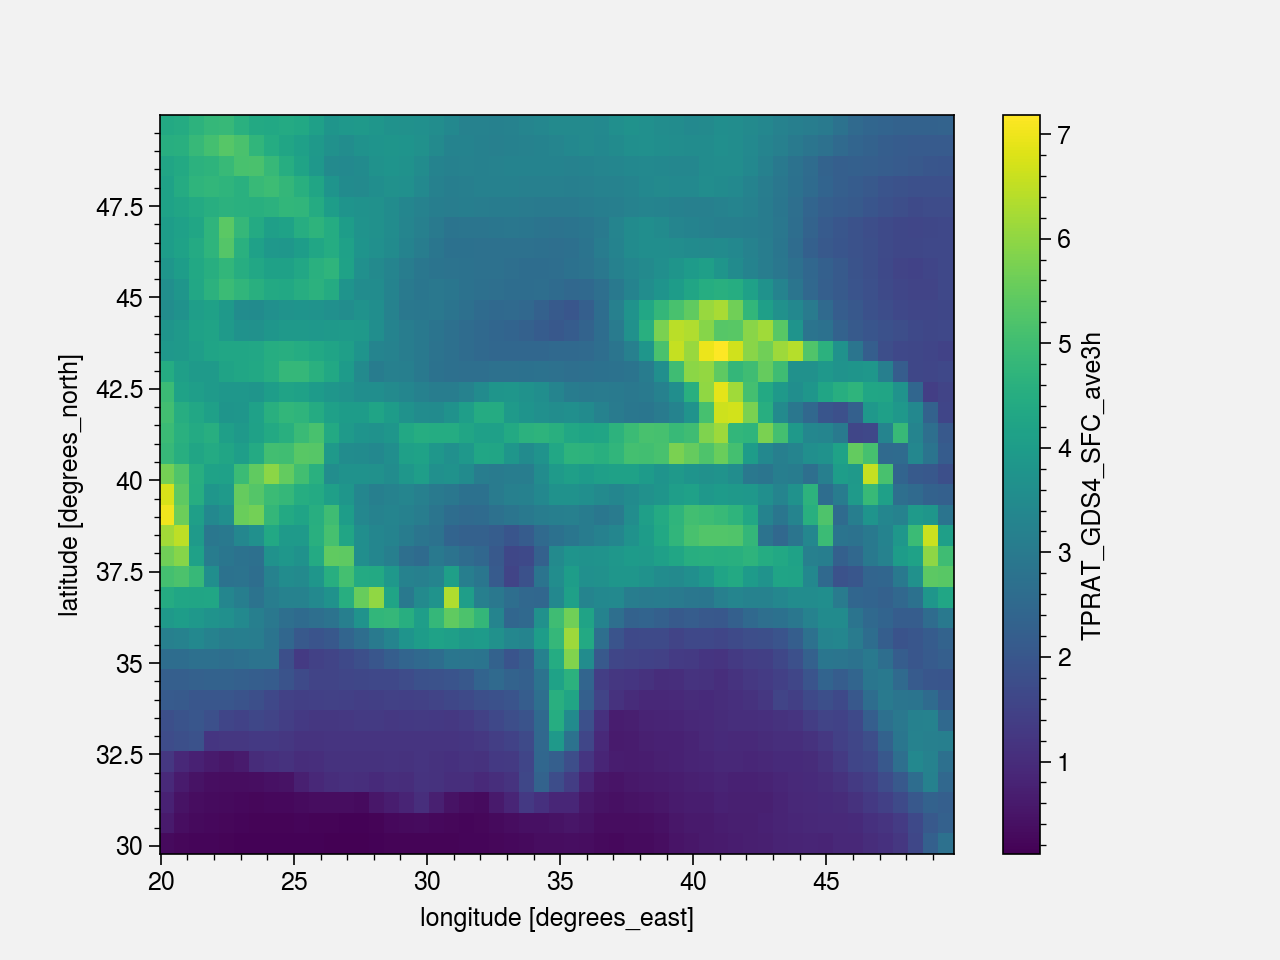

In [82]:
(dt_jra55['TPRAT_GDS4_SFC_ave3h'] / 2).mean(dim = 'initial_time0_hours').plot()

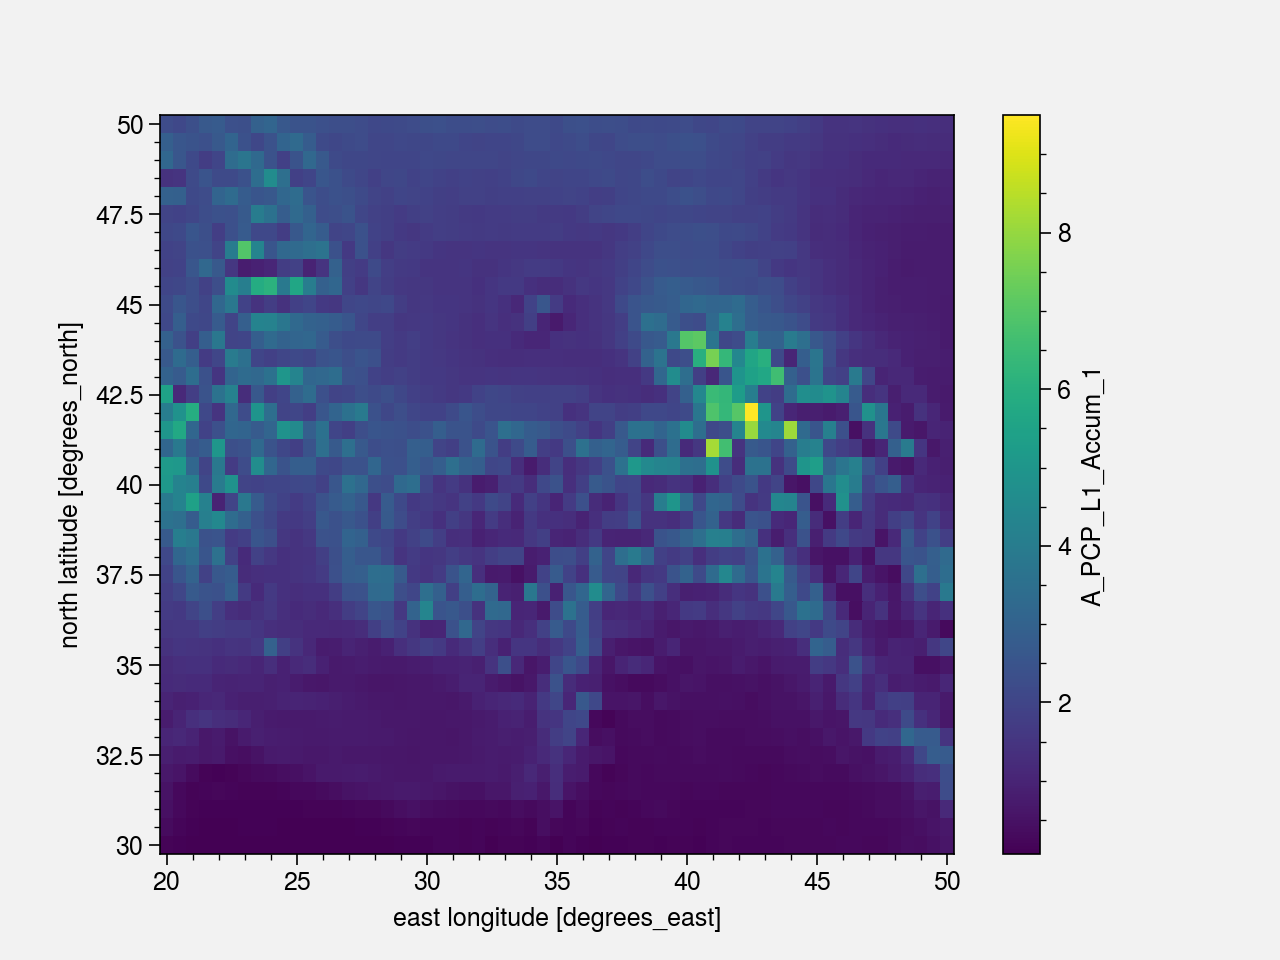

In [78]:
(dt_cfsr_cfsv2['A_PCP_L1_Accum_1'] * 6).mean(dim = 'time').plot()

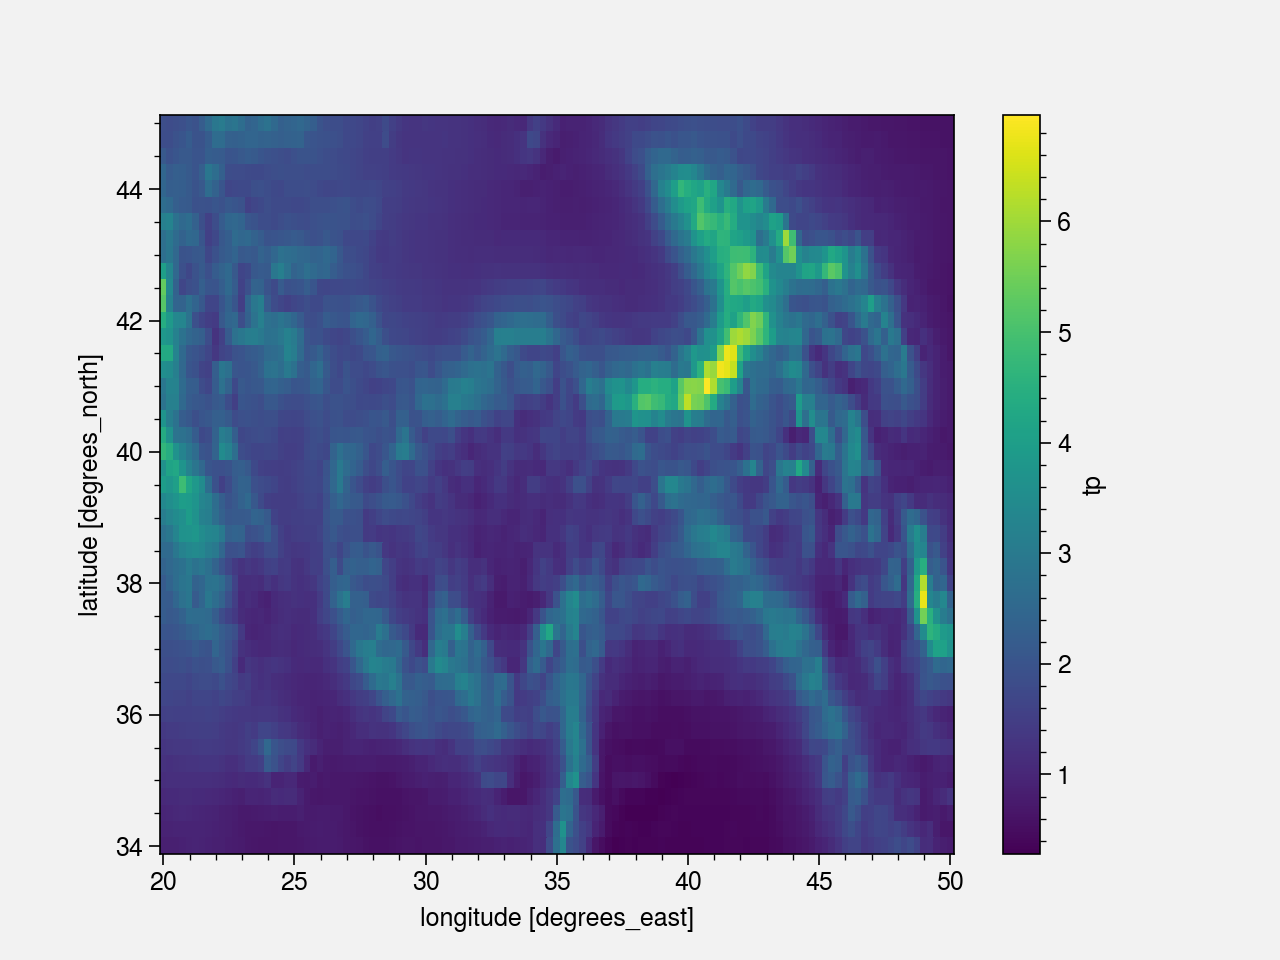

In [79]:
(dt_era5['tp'] * 1000).mean(dim = 'time').plot()

In [ ]:
def Visualize_Precipitation_Compare(self, ):      
        
        #get cmap
        cmap = plot.Colormap(
            'PuRd_r', 'Blue3' ,'Green1_r','Orange5', 'Purples_r',
            ratios=(10/65, 10/65, 15/65, 15/65, 15/65), name='SciVisColor', )
        
        g = self.data_2t_single[::2].plot.contourf(x="longitude", y="latitude", col="time", col_wrap=2, 
                       cmap = cmap, robust=True, 
                       levels = np.arange(-20, 46, 1,),
                        aspect=77/60,
                        subplot_kws = {'projection':cartopy.crs.Mercator()},
                           transform=ccrs.PlateCarree(),
                           
                        cbar_kwargs={
                                    "orientation": "horizontal",
                                    "shrink": 0.8,
                                    "aspect": 40,
                                    "pad": 0.01,
                                    "ticks": np.arange(-20, 46, 2),
                                    "label": 'ERA-5 | 2M TEMPERATURE(C) | MSLP(hPa) | WIND BARBS',
                                     },)
        
        for i, ax in enumerate(g.axes.flat):
            
            # ax common parameters
            self.ax_loop_parameters(ax, i)
            
            ax.add_feature(cartopy.feature.BORDERS, linewidth = 2,)
            ax.add_feature(cartopy.feature.COASTLINE, linewidth = 2,)
            
            #contourplot
            mesh = ax.contour(self.lon, self.lat, self.mslp_smooth[i,:,:], np.arange(920, 1060, 2, ),
                       colors='white', linewidths=1, 
                       transform=cartopy.crs.PlateCarree(), zorder=6,
                                          linestyles='solid')
            ax.clabel(mesh, fontsize=8, inline=1, inline_spacing=7, fmt='%i', rightside_up=True, use_clabeltext=True , zorder=5)


            #windbarbs
            ax.barbs(self.lon, self.lat, self.data_10u_single[i].values, self.data_10v_single[i].values, length=5,
                 regrid_shape=10, transform=cartopy.crs.PlateCarree(), zorder=30)
            
            self.ax_title(ax, i)
            
            
        #save figure
        plt.savefig(r'C:\Users\USER\JupyterLab\Climaturk_Site\Docs\STORMS\{}\2mtemp_mslp.jpeg'.format(self.dates, ),
                    bbox_inches='tight', optimize=True, progressive=True, dpi=150,
                    )  
        plt.close()